In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\Lakshya Pawar\\Desktop\\academics\\celebal technologies internship\\week 7\\assignment 7 (House Price Prediction)\\train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

<Axes: >

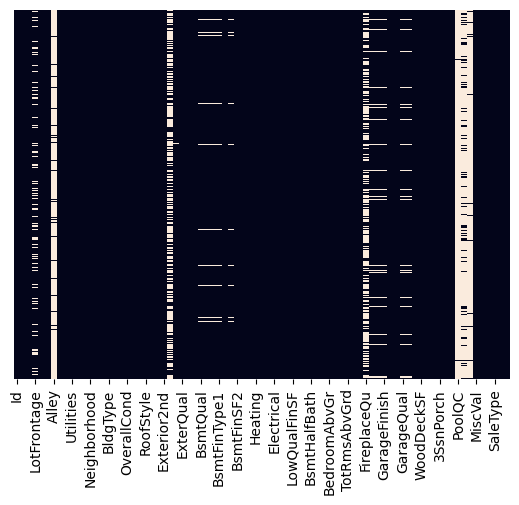

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [8]:
df['LotFrontage'].mean()

np.float64(70.04995836802665)

In [9]:
df['LotFrontage'].median()

np.float64(69.0)

In [10]:
df['SalePrice'].median()

np.float64(163000.0)

In [11]:
df['SalePrice'].mean()

np.float64(180921.19589041095)

In [12]:
df['SalePrice'].mode()

0    140000
Name: SalePrice, dtype: int64

<Axes: ylabel='count'>

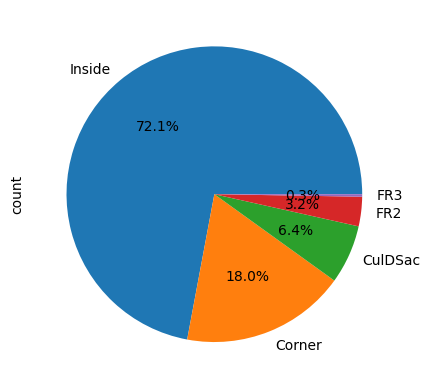

In [13]:
df['LotConfig'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

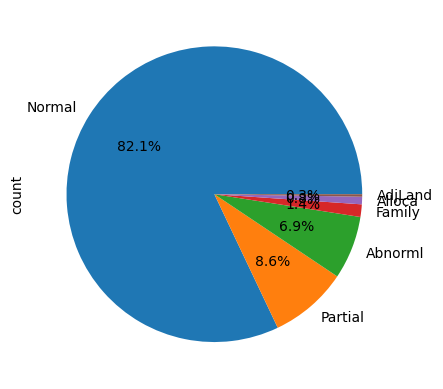

In [14]:
df['SaleCondition'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

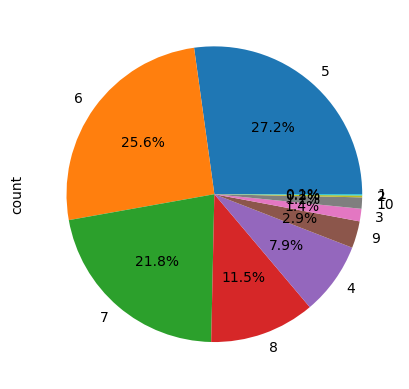

In [15]:
df['OverallQual'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

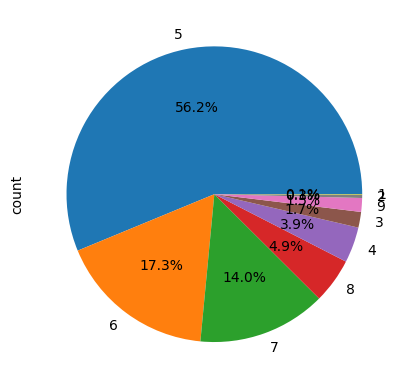

In [16]:
df['OverallCond'].value_counts().plot(kind='pie', autopct='%1.1f%%')

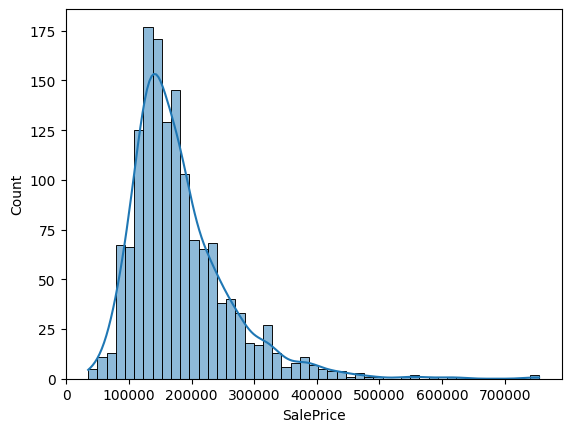

In [17]:
sns.histplot(x=df['SalePrice'], kde=True)
plt.show()

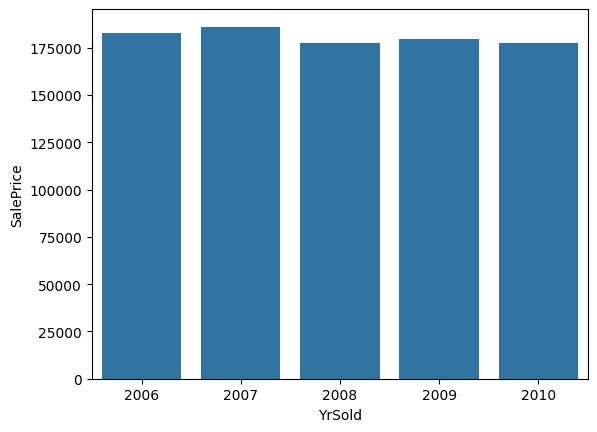

In [25]:
plot1 = pd.DataFrame(df.groupby(['YrSold'])['SalePrice'].mean()).reset_index()
ax = sns.barplot(x="YrSold", y="SalePrice", data = plot1)

In [26]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [27]:
df.drop(['Alley'], axis=1, inplace=True)

In [28]:
df.shape

(1460, 80)

In [29]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [30]:
df.drop(['PoolQC', 'Fence', 'MiscFeature', 'GarageYrBlt'], axis=1, inplace=True)

In [31]:
df.shape

(1460, 76)

In [32]:
df.drop(['Id'], axis=1, inplace=True)

In [33]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [34]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<Axes: >

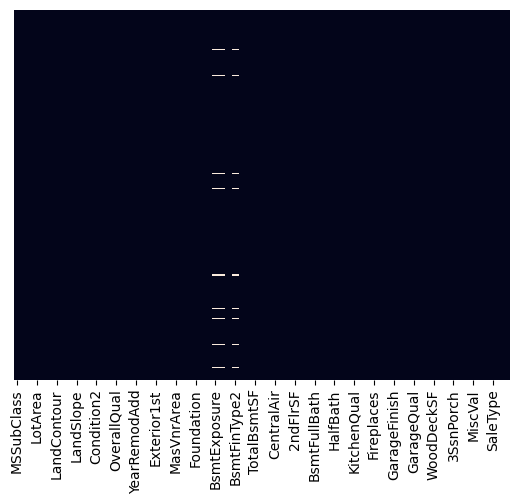

In [35]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [36]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<Axes: >

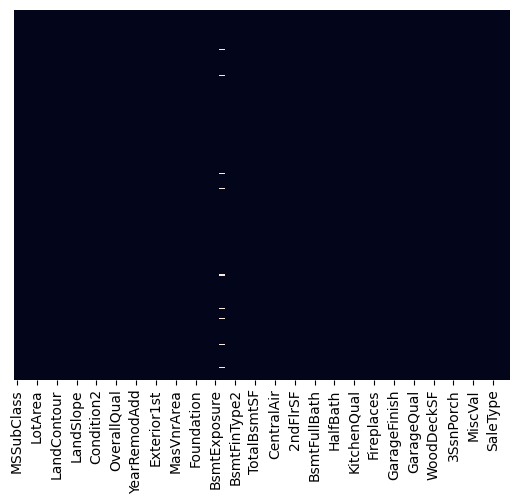

In [37]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [38]:
df.dropna(inplace=True)

<Axes: >

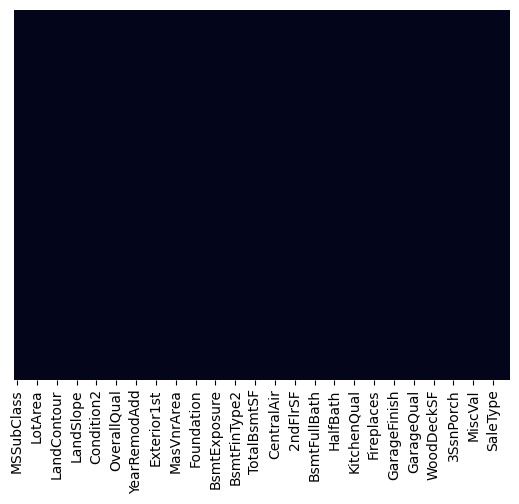

In [39]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [40]:
df.shape

(1422, 75)

In [41]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [42]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

In [43]:
grab_col_names(df)

Observations: 1422
Variables: 75
cat_cols: 49
num_cols: 25
cat_but_car: 1
num_but_cat: 11


(['MSZoning',
  'Street',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PavedDrive',
  'SaleType',
  'SaleCondition',
  'OverallCond',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'Fireplaces',
  'GarageCars',
  'PoolArea',
  'YrSold'],
 ['MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrL

In [44]:
df.shape

(1422, 75)

In [45]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [46]:
len(columns)

39

In [47]:
main_df = df.copy()

In [48]:
test_df = pd.read_csv('formulatedtest.csv')

In [49]:
test_df.shape

(1459, 74)

In [50]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [51]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1 - 1.5 * interquartile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name]>up_limit) | (dataframe[col_name]<low_limit)].any(axis=None):
        return True
    else:
        return False

In [52]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [53]:
final_df = pd.concat([df, test_df], axis=0)

In [54]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [55]:
final_df.shape

(2881, 75)

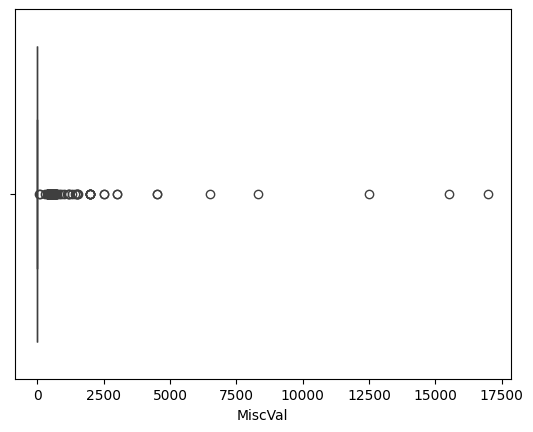

In [56]:
sns.boxplot(x=final_df['MiscVal'])
plt.show()

In [57]:
check_outlier(final_df, 'MiscVal')

True

In [58]:
replace_with_thresholds(final_df, 'MiscVal')

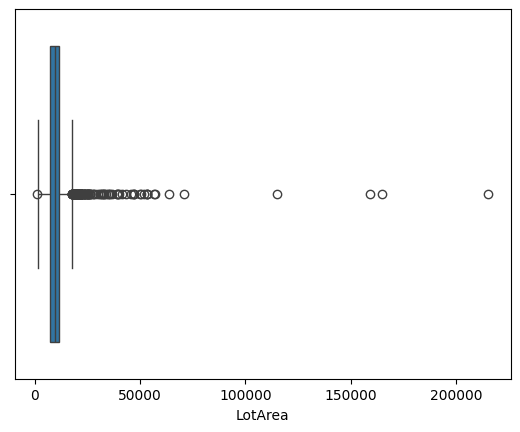

In [59]:
sns.boxplot(x=final_df['LotArea'])
plt.show()

In [60]:
check_outlier(final_df, 'LotArea')

True

In [61]:
replace_with_thresholds(final_df, 'LotArea')

In [62]:
check_outlier(final_df, 'LotArea')

False

In [63]:
replace_with_thresholds(final_df, 'LotFrontage')

In [64]:
check_outlier(final_df, 'MasVnrArea')

True

In [65]:
replace_with_thresholds(final_df, 'MasVnrArea')

In [66]:
check_outlier(final_df, 'MasVnrArea')

False

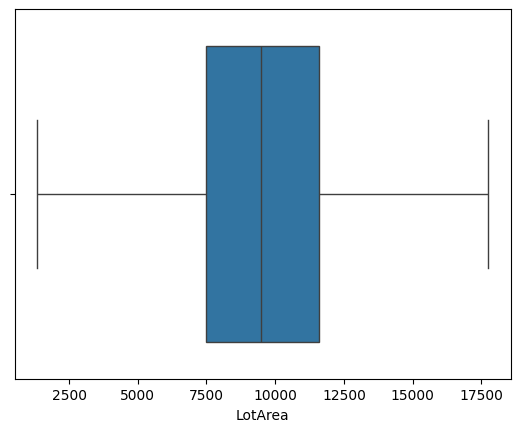

In [67]:
sns.boxplot(x=final_df['LotArea'])
plt.show()

In [68]:
replace_with_thresholds(final_df, 'BsmtFinSF1')

In [69]:
replace_with_thresholds(final_df, 'BsmtFinSF2')

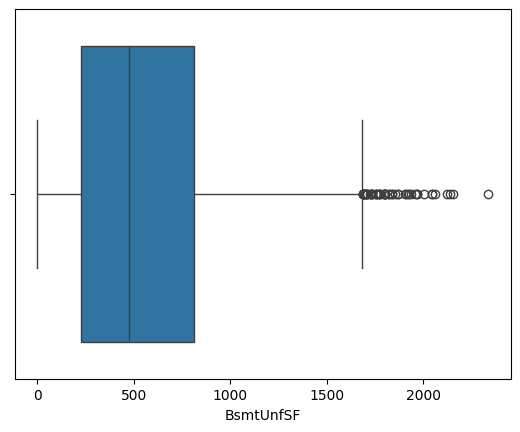

In [70]:
sns.boxplot(x=final_df['BsmtUnfSF'])
plt.show()

In [71]:
replace_with_thresholds(final_df, 'BsmtUnfSF')

In [72]:
replace_with_thresholds(final_df, 'TotalBsmtSF')

In [73]:
replace_with_thresholds(final_df, '1stFlrSF')

In [74]:
replace_with_thresholds(final_df, '2ndFlrSF')

In [75]:
replace_with_thresholds(final_df, 'LowQualFinSF')

In [76]:
replace_with_thresholds(final_df, 'GrLivArea')

C:\Users\Lakshya Pawar\AppData\Local\Temp\ipykernel_18208\130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '201.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit


In [77]:
replace_with_thresholds(final_df, 'TotRmsAbvGrd')

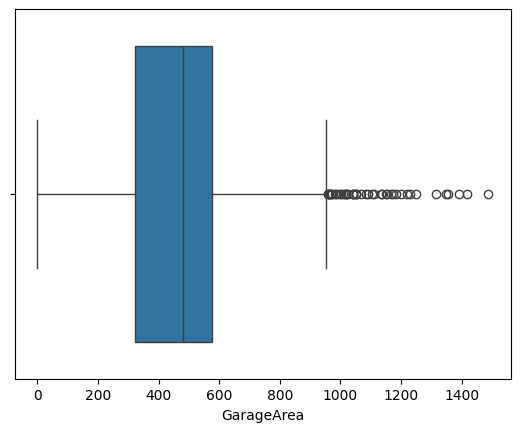

In [78]:
sns.boxplot(x=final_df['GarageArea'])
plt.show()

In [79]:
replace_with_thresholds(final_df, 'GarageArea')

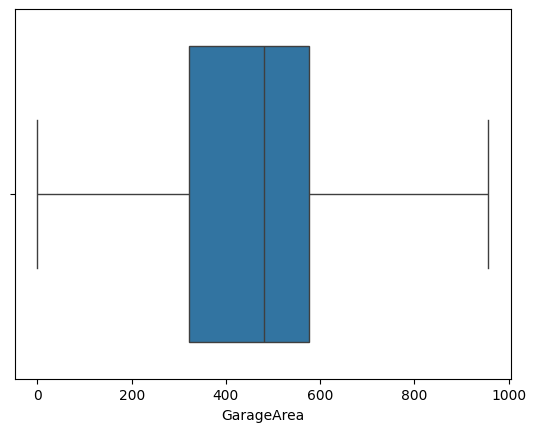

In [80]:
sns.boxplot(x=final_df['GarageArea'])
plt.show()

In [81]:
check_outlier(final_df, 'GarageArea')

False

In [82]:
check_outlier(final_df, 'PoolArea')

True

In [83]:
replace_with_thresholds(final_df, 'PoolArea')

In [84]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True).astype(int)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [85]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [86]:
final_df.shape

(2881, 234)

In [87]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [88]:
final_df.shape

(2881, 174)

In [89]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,31.5,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,31.5,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,107.5,17750,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [90]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [91]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [92]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [93]:
df_Train.shape

(1422, 174)

In [94]:
df_Test.shape

(1459, 174)

In [95]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\Lakshya Pawar\AppData\Local\Temp\ipykernel_18208\3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [96]:
df_Test.shape

(1459, 173)

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [98]:
X = df_Train.drop(['SalePrice'], axis=1)
y = df_Train['SalePrice']

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

In [100]:
X_train.shape

(1137, 173)

In [101]:
Y_train.shape

(1137,)

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'MiscVal', 'PoolArea', 'GarageCars', 'GarageArea', 'Fireplaces', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'LowQualFinSF', 'TotalBsmtSF', 'BsmtUnfSF']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'MiscVal', 'PoolArea', 'GarageCars', 'GarageArea', 'Fireplaces', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'LowQualFinSF', 'TotalBsmtSF', 'BsmtUnfSF']])

In [103]:
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'MiscVal', 'PoolArea', 'GarageCars', 'GarageArea', 'Fireplaces', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'LowQualFinSF', 'TotalBsmtSF', 'BsmtUnfSF']] = scaler.transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'MiscVal', 'PoolArea', 'GarageCars', 'GarageArea', 'Fireplaces', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'LowQualFinSF', 'TotalBsmtSF', 'BsmtUnfSF']])

In [104]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)
y_pred = model_1.predict(X_test)
mean_squared_error(Y_test, y_pred)

np.float64(1130460648.9682524)

In [105]:
model_2 = RandomForestRegressor(n_estimators=100)
model_2.fit(X_train, Y_train)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

np.float64(1107461060.7838252)

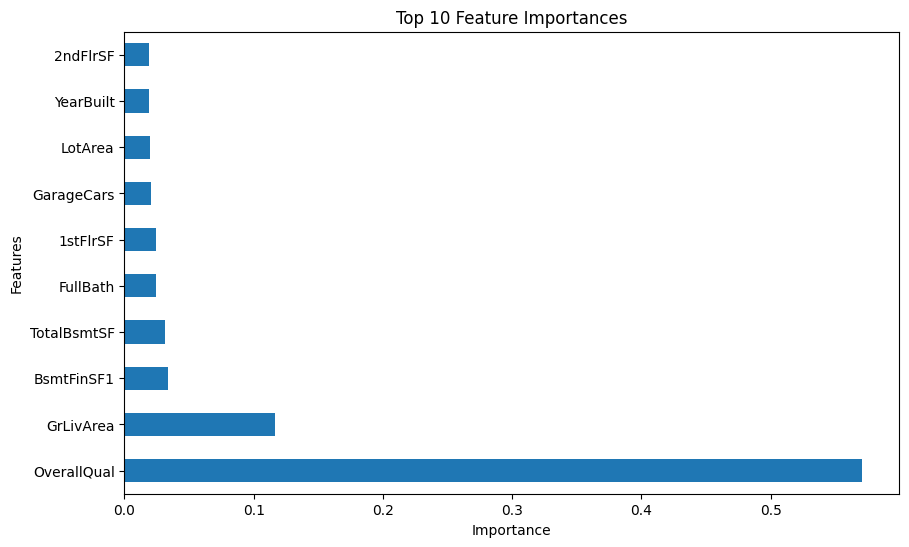

In [107]:
feature_importance = pd.Series(model_2.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

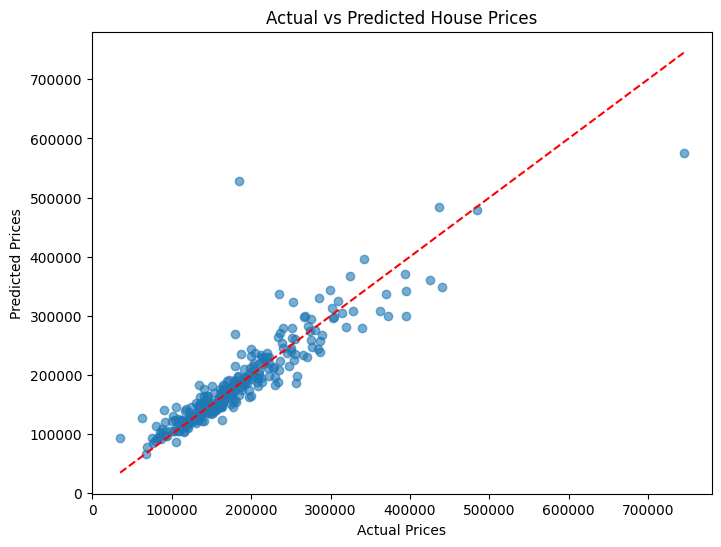

In [109]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, alpha=0.6)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.show()

In [110]:
from sklearn.linear_model import Ridge

model_3 = Ridge(alpha=1.0)
model_3.fit(X_train, Y_train)
y_pred = model_3.predict(X_test)
mean_squared_error(Y_test, y_pred)

np.float64(1102642091.0906198)

In [111]:
model_1 = LinearRegression()
model_1.fit(X, y)
y_pred = model_1.predict(X_test)
mean_squared_error(Y_test, y_pred)

np.float64(18352642341.446835)

In [112]:
model_2 = RandomForestRegressor(n_estimators=100)
model_2.fit(X, y)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

np.float64(5372673376.019718)

In [113]:
test_df_sample = pd.read_csv('sample_submission.csv')

In [114]:
pred = model_2.predict(df_Test)

final = pd.DataFrame()
final['Id'] = test_df_sample['Id']
final['SalePrice'] = pred

final.to_csv('final_output.csv', index = False)